### Data Analysis with Ibis Framework
#### Ibis CrashCourse
One API for 20 + Backends
+ Ibis provides a common API for data manipulation in Python, and compiling that API into the backend’s native language. 
+ This means you can learn a single API and use it across any supported backend (execution engine).

ibis -> SQL syntax -> backends
     -> DataFrame -> backends

#### Installation
+ pip install 'ibis-framework[duckdb,examples]'

In [1]:
# Load Pkg
import ibis

In [2]:
# Methods and Attr
dir(ibis)

['BaseBackend',
 'Column',
 'Deferred',
 'Expr',
 'IbisError',
 'Scalar',
 'Schema',
 'Table',
 'Value',
 '_',
 'aggregate',
 'and_',
 'api',
 'array',
 'asc',
 'bigquery',
 'case',
 'clickhouse',
 'coalesce',
 'connect',
 'cross_join',
 'cume_dist',
 'cumulative_window',
 'dask',
 'datafusion',
 'date',
 'decompile',
 'deferred',
 'dense_rank',
 'desc',
 'difference',
 'druid',
 'dtype',
 'duckdb',
 'e',
 'examples',
 'exasol',
 'flink',
 'following',
 'geo_area',
 'geo_as_binary',
 'geo_as_ewkb',
 'geo_as_ewkt',
 'geo_as_text',
 'geo_azimuth',
 'geo_buffer',
 'geo_centroid',
 'geo_contains',
 'geo_contains_properly',
 'geo_covered_by',
 'geo_covers',
 'geo_crosses',
 'geo_d_fully_within',
 'geo_d_within',
 'geo_difference',
 'geo_disjoint',
 'geo_distance',
 'geo_end_point',
 'geo_envelope',
 'geo_equals',
 'geo_geometry_n',
 'geo_geometry_type',
 'geo_intersection',
 'geo_intersects',
 'geo_is_valid',
 'geo_length',
 'geo_line_locate_point',
 'geo_line_merge',
 'geo_line_substring',

In [ ]:
# Reading Data
+ DB Format
+ File Format

In [3]:
# Connection to DB Backend
# Reading SQLite DB: // relative path to file ,/// absolute path
conn = ibis.connect("sqlite://data/output.db")

In [6]:
# Check default backend
ibis.get_backend()

In [ ]:
# Set backend
ibis.set_backend('duckdb')

In [7]:
# List DB inside the connection
conn.list_databases()

['main']

In [8]:
# List the tables inside the db
conn.list_tables()

['MOCK_DATA']

In [9]:
# Show tables in db
conn.tables

Tables
------
- MOCK_DATA

In [10]:
# Select a table to talk with or analyse
df = conn.table("MOCK_DATA")

In [11]:
df

DatabaseTable: MOCK_DATA
  id             int64
  first_name     string
  last_name      string
  email          string
  gender         string
  ip_address     string
  countries      string
  admission_date string
  salary         string
  job            string

In [13]:
# Preview the data
df.head().execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist


In [14]:
# Preview the first 10 rows of the data
df.head(10).execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist
5,6,Jim,Benedito,jbenedito5@google.ca,Male,62.191.70.179,Pakistan,10/1/2023,$729498.53,Social Worker
6,7,Kleon,Crittal,kcrittal6@slate.com,Male,26.18.70.123,Philippines,5/8/2024,$91296.57,Account Coordinator
7,8,Winston,Rosenthaler,wrosenthaler7@mashable.com,Male,8.227.77.187,Nigeria,7/27/2023,$794690.22,VP Quality Control
8,9,Sig,Gammett,sgammett8@discovery.com,Male,16.118.33.118,China,10/28/2023,$673898.52,Social Worker
9,10,Colleen,Fargher,cfargher9@independent.co.uk,Female,228.57.77.8,Mexico,11/17/2023,$852777.69,GIS Technical Architect


In [15]:
# To show the SQL syntax behind this command
ibis.to_sql(df.head(10))

```sql
SELECT
  *
FROM "MOCK_DATA" AS "t0"
LIMIT 10
```

In [16]:
# See all columns
df.columns

['id',
 'first_name',
 'last_name',
 'email',
 'gender',
 'ip_address',
 'countries',
 'admission_date',
 'salary',
 'job']

In [19]:
# Describe
df.describe()

r0 := DatabaseTable: MOCK_DATA
  id             int64
  first_name     string
  last_name      string
  email          string
  gender         string
  ip_address     string
  countries      string
  admission_date string
  salary         string
  job            string

r1 := Aggregate[r0]
  metrics:
    name:   'gender'
    pos:    4
    type:   'string'
    count:  Count(IsNull(r0.gender))
    nulls:  Sum(IsNull(r0.gender))
    unique: CountDistinct(r0.gender)
    mode:   Mode(r0.gender)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25:    Cast(None, to=float64)
    p50:    Cast(None, to=float64)
    p75:    Cast(None, to=float64)
    max:    Cast(None, to=float64)

r2 := Aggregate[r0]
  metrics:
    name:   'ip_address'
    pos:    5
    type:   'string'
    count:  Count(IsNull(r0.ip_address))
    nulls:  Sum(IsNull(r0.ip_address))
    unique: CountDistinct(r0.ip_address)
    mode:   Mode(r0.ip_address)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25:    Cast(None, to=float64)
    p50:    Cast(None, to=float64)
    p75:    Cast(None, to=float64)
    max:    Cast(None, to=float64)

r3 := Aggregate[r0]
  metrics:
    name:   'countries'
    pos:    6
    type:   'string'
    count:  Count(IsNull(r0.countries))
    nulls:  Sum(IsNull(r0.countries))
    unique: CountDistinct(r0.countries)
    mode:   Mode(r0.countries)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25:    Cast(None, to=float64)
    p50:    Cast(None, to=float64)
    p75:    Cast(None, to=float64)
    max:    Cast(None, to=float64)

r4 := Aggregate[r0]
  metrics:
    name:   'admission_date'
    pos:    7
    type:   'string'
    count:  Count(IsNull(r0.admission_date))
    nulls:  Sum(IsNull(r0.admission_date))
    unique: CountDistinct(r0.admission_date)
    mode:   Mode(r0.admission_date)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25:    Cast(None, to=float64)
    p50:    Cast(None, to=float64)
    p75:    Cast(None, to=float64)
    max:    Cast(None, to=float64)

r5 := Aggregate[r0]
  metrics:
    name:   'salary'
    pos:    8
    type:   'string'
    count:  Count(IsNull(r0.salary))
    nulls:  Sum(IsNull(r0.salary))
    unique: CountDistinct(r0.salary)
    mode:   Mode(r0.salary)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25:    Cast(None, to=float64)
    p50:    Cast(None, to=float64)
    p75:    Cast(None, to=float64)
    max:    Cast(None, to=float64)

r6 := Aggregate[r0]
  metrics:
    name:   'job'
    pos:    9
    type:   'string'
    count:  Count(IsNull(r0.job))
    nulls:  Sum(IsNull(r0.job))
    unique: CountDistinct(r0.job)
    mode:   Mode(r0.job)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25:    Cast(None, to=float64)
    p50:    Cast(None, to=float64)
    p75:    Cast(None, to=float64)
    max:    Cast(None, to=float64)

r7 := Aggregate[r0]
  metrics:
    name:   'id'
    pos:    0
    type:   'int64'
    count:  Count(IsNull(r0.id))
    nulls:  Sum(IsNull(r0.id))
    unique: CountDistinct(r0.id)
    mode:   Cast(None, to=string)
    mean:   Mean(r0.id)
    std:    StandardDev(r0.id, how='sample')
    min:    Cast(Min(r0.id), to=float64)
    p25:    Quantile(r0.id, quantile=0.25)
    p50:    Quantile(r0.id, quantile=0.5)
    p75:    Quantile(r0.id, quantile=0.75)
    max:    Cast(Max(r0.id), to=float64)

r8 := Aggregate[r0]
  metrics:
    name:   'first_name'
    pos:    1
    type:   'string'
    count:  Count(IsNull(r0.first_name))
    nulls:  Sum(IsNull(r0.first_name))
    unique: CountDistinct(r0.first_name)
    mode:   Mode(r0.first_name)
    mean:   Cast(None, to=float64)
    std:    Cast(None, to=float64)
    min:    Cast(None, to=float64)
    p25

In [21]:
# How to Select Columns
# df["column']
df.first_name.execute()

0       Archibold
1           Cello
2      Donnamarie
3            Whit
4         Juliann
          ...    
995    Bernadette
996      Gregorio
997         Emile
998        Felike
999      Prentice
Name: first_name, Length: 1000, dtype: object

In [22]:
# Select a column
df.select("first_name").execute()

,first_name
0,Archibold
1,Cello
2,Donnamarie
3,Whit
4,Juliann
...,...
995,Bernadette
996,Gregorio
997,Emile
998,Felike


In [23]:
# Select multiple columns
df.select("first_name","last_name").execute()

,first_name,last_name
0,Archibold,Kerwin
1,Cello,Tackell
2,Donnamarie,Carp
3,Whit,Burnhams
4,Juliann,Petran
...,...,...
995,Bernadette,Danne
996,Gregorio,Jovicevic
997,Emile,McCard
998,Felike,Mathonnet


In [24]:
# Select multiple columns
df.select(df.first_name,df.last_name).execute()

,first_name,last_name
0,Archibold,Kerwin
1,Cello,Tackell
2,Donnamarie,Carp
3,Whit,Burnhams
4,Juliann,Petran
...,...,...
995,Bernadette,Danne
996,Gregorio,Jovicevic
997,Emile,McCard
998,Felike,Mathonnet


In [25]:
# Select multiple columns with a limit
df.select(df.first_name,df.last_name).limit(3).execute()

,first_name,last_name
0,Archibold,Kerwin
1,Cello,Tackell
2,Donnamarie,Carp


In [26]:
# How to select columns based on a condition
df.filter(df.gender == "Male").execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist
2,6,Jim,Benedito,jbenedito5@google.ca,Male,62.191.70.179,Pakistan,10/1/2023,$729498.53,Social Worker
3,7,Kleon,Crittal,kcrittal6@slate.com,Male,26.18.70.123,Philippines,5/8/2024,$91296.57,Account Coordinator
4,8,Winston,Rosenthaler,wrosenthaler7@mashable.com,Male,8.227.77.187,Nigeria,7/27/2023,$794690.22,VP Quality Control
...,...,...,...,...,...,...,...,...,...,...
457,984,Davidde,McGarvey,dmcgarveyrb@vimeo.com,Male,25.196.154.57,Venezuela,6/16/2024,$309996.00,Director of Sales
458,995,Cyrille,Martinets,cmartinetsrm@aol.com,Male,163.148.184.67,Aland Islands,6/24/2024,$401702.44,Professor
459,997,Gregorio,Jovicevic,gjovicevicro@cloudflare.com,Male,35.168.22.57,Indonesia,4/13/2024,$508042.47,Structural Analysis Engineer
460,998,Emile,McCard,emccardrp@elpais.com,Male,81.105.239.70,Indonesia,10/18/2023,$479761.43,Actuary


In [28]:
# How to select columns based on a condition
df.filter((df.gender == "Male") & (df.job == "Social Worker")).execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job
0,6,Jim,Benedito,jbenedito5@google.ca,Male,62.191.70.179,Pakistan,10/1/2023,$729498.53,Social Worker
1,9,Sig,Gammett,sgammett8@discovery.com,Male,16.118.33.118,China,10/28/2023,$673898.52,Social Worker
2,229,Erie,Adamski,eadamski6c@qq.com,Male,75.214.238.44,Indonesia,7/23/2023,$234798.83,Social Worker
3,375,Ario,Olenchenko,aolenchenkoae@state.tx.us,Male,129.65.214.233,Taiwan,6/24/2024,$387248.53,Social Worker
4,461,Irvine,Kembley,ikembleycs@statcounter.com,Male,99.40.58.217,Thailand,7/4/2024,$344065.21,Social Worker
5,664,Curt,Dawtry,cdawtryif@timesonline.co.uk,Male,227.55.114.194,China,2/10/2024,$825329.51,Social Worker
6,914,Raymond,Pucknell,rpucknellpd@admin.ch,Male,69.217.100.86,Brazil,3/19/2024,$490527.14,Social Worker


In [29]:
ibis.to_sql(df.filter((df.gender == "Male") & (df.job == "Social Worker")))

```sql
SELECT
  *
FROM "MOCK_DATA" AS "t0"
WHERE
  "t0"."gender" = 'Male' AND "t0"."job" = 'Social Worker'
```

In [ ]:
### Data Cleaning using Ibis and Data Transformation
+ mutate

In [30]:
df.head().execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist


In [35]:
df.salary.replace("$", '').cast('float').execute()

0      419060.02
1      862525.69
2      775520.35
3       15838.80
4      396650.82
         ...    
995    108899.59
996    508042.47
997    479761.43
998    603695.79
999    748644.39
Name: Cast(StringReplace(salary, '$', ''), float64), Length: 1000, dtype: float64

In [37]:
### How to Add New Columns, convert to numeric and save
df.mutate(salary_amount=df.salary.replace("$", '').cast('float')).execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job,salary_amount
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I,419060.02
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist,862525.69
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate,775520.35
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist,15838.80
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist,396650.82
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Bernadette,Danne,bdannern@discuz.net,Bigender,217.76.72.232,Philippines,1/19/2024,$108899.59,Dental Hygienist,108899.59
996,997,Gregorio,Jovicevic,gjovicevicro@cloudflare.com,Male,35.168.22.57,Indonesia,4/13/2024,$508042.47,Structural Analysis Engineer,508042.47
997,998,Emile,McCard,emccardrp@elpais.com,Male,81.105.239.70,Indonesia,10/18/2023,$479761.43,Actuary,479761.43
998,999,Felike,Mathonnet,fmathonnetrq@arizona.edu,Male,204.144.168.63,China,10/25/2023,$603695.79,General Manager,603695.79


In [38]:
### How to Add New Columns, convert to numeric and save
df = df.mutate(salary_amount=df.salary.replace("$", '').cast('float'))

In [40]:
df.head().execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job,salary_amount
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I,419060.02
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist,862525.69
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate,775520.35
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist,15838.80
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist,396650.82


In [ ]:
### Summarizing data via aggregates
+ mean, max,min,count,sum

In [41]:
# Get min
df.salary_amount.min().execute()

3501.24

In [42]:
# Get max
df.salary_amount.max().execute()

1099748.47

In [43]:
# Get mean
df.salary_amount.mean().execute()

546193.3254099999

In [45]:
# Get max
df.first_name.min().execute()

'Abbott'

In [46]:
## How to use multiple aggregate at once
df.aggregate([df.salary_amount.max(),df.salary_amount.min(),df.salary_amount.mean()]).execute()

,Max(salary_amount),Min(salary_amount),Mean(salary_amount)
0,1099748.47,3501.24,546193.32541


In [47]:
#### How to Order By
df.head().execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job,salary_amount
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I,419060.02
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist,862525.69
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate,775520.35
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist,15838.80
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist,396650.82


In [48]:
df.order_by(df.first_name).execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job,salary_amount
0,344,Abbott,Hoogendorp,ahoogendorp9j@go.com,Male,233.200.231.55,France,7/23/2023,$6053.09,GIS Technical Architect,6053.09
1,26,Abe,Hollingsbee,ahollingsbeep@list-manage.com,Male,4.114.135.128,Suriname,6/11/2024,$614657.65,Graphic Designer,614657.65
2,147,Abrahan,Luetkemeyers,aluetkemeyers42@soundcloud.com,Male,217.68.114.228,Brazil,4/29/2024,$1036357.72,Editor,1036357.72
3,907,Ad,Sturror,asturrorp6@chronoengine.com,Male,57.180.1.153,China,6/5/2024,$978134.41,Speech Pathologist,978134.41
4,358,Adair,Loch,aloch9x@nydailynews.com,Male,49.47.167.77,China,12/13/2023,$384267.70,Research Assistant II,384267.70
...,...,...,...,...,...,...,...,...,...,...,...
995,285,Yolande,Shevlan,yshevlan7w@wsj.com,Female,201.17.45.215,Malaysia,3/9/2024,$911230.74,VP Sales,911230.74
996,323,York,Scatchar,yscatchar8y@ca.gov,Male,5.200.33.40,Sweden,12/19/2023,$701754.98,Mechanical Systems Engineer,701754.98
997,198,Zaneta,Brevetor,zbrevetor5h@webmd.com,Female,227.230.211.86,Togo,10/14/2023,$590232.71,Clinical Specialist,590232.71
998,74,Zebulen,Labrone,zlabrone21@bizjournals.com,Male,142.26.139.174,Kyrgyzstan,11/16/2023,$529294.49,Software Test Engineer II,529294.49


In [49]:
# Order by descending order
df.order_by(df.first_name.desc()).execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job,salary_amount
0,24,Zorana,Pauleit,zpauleitn@wix.com,Female,220.3.31.204,Indonesia,3/27/2024,$110174.88,Pharmacist,110174.88
1,74,Zebulen,Labrone,zlabrone21@bizjournals.com,Male,142.26.139.174,Kyrgyzstan,11/16/2023,$529294.49,Software Test Engineer II,529294.49
2,198,Zaneta,Brevetor,zbrevetor5h@webmd.com,Female,227.230.211.86,Togo,10/14/2023,$590232.71,Clinical Specialist,590232.71
3,323,York,Scatchar,yscatchar8y@ca.gov,Male,5.200.33.40,Sweden,12/19/2023,$701754.98,Mechanical Systems Engineer,701754.98
4,285,Yolande,Shevlan,yshevlan7w@wsj.com,Female,201.17.45.215,Malaysia,3/9/2024,$911230.74,VP Sales,911230.74
...,...,...,...,...,...,...,...,...,...,...,...
995,358,Adair,Loch,aloch9x@nydailynews.com,Male,49.47.167.77,China,12/13/2023,$384267.70,Research Assistant II,384267.70
996,907,Ad,Sturror,asturrorp6@chronoengine.com,Male,57.180.1.153,China,6/5/2024,$978134.41,Speech Pathologist,978134.41
997,147,Abrahan,Luetkemeyers,aluetkemeyers42@soundcloud.com,Male,217.68.114.228,Brazil,4/29/2024,$1036357.72,Editor,1036357.72
998,26,Abe,Hollingsbee,ahollingsbeep@list-manage.com,Male,4.114.135.128,Suriname,6/11/2024,$614657.65,Graphic Designer,614657.65


### Grouping Data
+ using group_by

In [52]:
# Find the total number of counts per gender
df.group_by("gender").aggregate(df.gender.count()).execute()

,gender,Count(gender)
0,Agender,12
1,Bigender,16
2,Female,442
3,Genderfluid,15
4,Genderqueer,18
5,Male,462
6,Non-binary,18
7,Polygender,17


In [53]:
# show sql syntax
ibis.to_sql(df.group_by("gender").aggregate(df.gender.count()))

```sql
SELECT
  "t1"."gender",
  COUNT("t1"."gender") AS "Count(gender)"
FROM (
  SELECT
    "t0"."id",
    "t0"."first_name",
    "t0"."last_name",
    "t0"."email",
    "t0"."gender",
    "t0"."ip_address",
    "t0"."countries",
    "t0"."admission_date",
    "t0"."salary",
    "t0"."job",
    CAST(REPLACE("t0"."salary", '$', '') AS REAL) AS "salary_amount"
  FROM "MOCK_DATA" AS "t0"
) AS "t1"
GROUP BY
  1
```

In [54]:
# Value counts for class distri
df.gender.value_counts().execute()

,gender,gender_count
0,Agender,12
1,Bigender,16
2,Female,442
3,Genderfluid,15
4,Genderqueer,18
5,Male,462
6,Non-binary,18
7,Polygender,17


In [55]:
# Value counts for class distri
df.job.value_counts().execute()

,job,job_count
0,Account Coordinator,4
1,Account Executive,13
2,Account Representative I,3
3,Account Representative II,3
4,Account Representative III,1
...,...,...
179,Web Designer IV,2
180,Web Developer I,1
181,Web Developer II,1
182,Web Developer III,3


In [56]:
# Complex Query via Chain
df.filter(df.gender== "Female").group_by("job").aggregate(df.salary_amount.mean()).execute()

,job,Mean(salary_amount)
0,Account Executive,525216.196667
1,Account Representative I,232692.045000
2,Account Representative IV,564528.517500
3,Accountant I,298182.090000
4,Accountant IV,583151.075000
...,...,...
139,Web Designer IV,903516.890000
140,Web Developer I,104932.870000
141,Web Developer II,511496.770000
142,Web Developer III,776457.145000


#### Data Visualizations using Ibis

In [57]:
# load data vis pgs
import seaborn as sns

<Axes: xlabel='job', ylabel='job_count'>

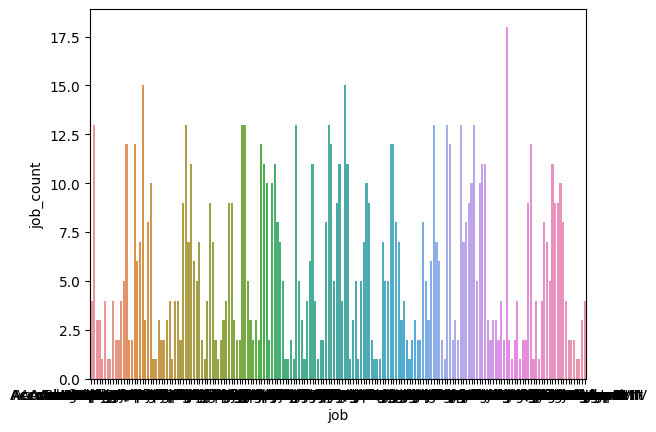

In [58]:
sns.barplot(df.job.value_counts().execute(),x="job",y="job_count")

<Axes: xlabel='gender', ylabel='gender_count'>

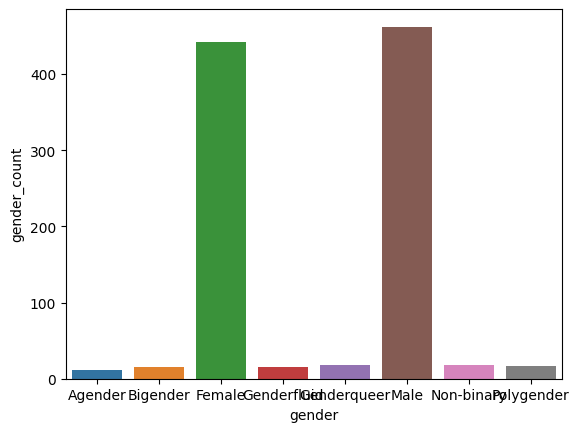

In [59]:
sns.barplot(df.gender.value_counts().execute(),
           x="gender",
           y="gender_count"
           )

In [60]:
### Reading From CSV Files in Ibis
df_csv = ibis.read_csv("data/data.csv")

In [61]:
df_csv.head().execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job
0,1,Bill,Lumsden,blumsden0@disqus.com,Male,72.183.126.186,Poland,2023-12-22,$564235.11,Nurse
1,2,Mara,Bunner,mbunner1@digg.com,Female,32.230.102.228,Sweden,2023-11-21,$609665.02,Nuclear Power Engineer
2,3,Sydney,Flello,sflello2@deliciousdays.com,Non-binary,70.23.71.128,Japan,2024-02-12,$103914.45,Data Coordinator
3,4,Winnie,Povele,wpovele3@livejournal.com,Male,246.66.70.181,China,2024-02-10,$665288.04,Help Desk Operator
4,5,Frannie,Osgerby,fosgerby4@unc.edu,Male,234.67.3.174,Philippines,2023-11-06,$662848.23,Senior Editor


In [ ]:
df_csv = ibis.read_parquet("data/data.parguet")

In [62]:
dir(ibis)

['BaseBackend',
 'Column',
 'Deferred',
 'Expr',
 'IbisError',
 'Scalar',
 'Schema',
 'Table',
 'Value',
 '_',
 'aggregate',
 'and_',
 'api',
 'array',
 'asc',
 'bigquery',
 'case',
 'clickhouse',
 'coalesce',
 'connect',
 'cross_join',
 'cume_dist',
 'cumulative_window',
 'dask',
 'datafusion',
 'date',
 'decompile',
 'deferred',
 'dense_rank',
 'desc',
 'difference',
 'druid',
 'dtype',
 'duckdb',
 'e',
 'examples',
 'exasol',
 'flink',
 'following',
 'geo_area',
 'geo_as_binary',
 'geo_as_ewkb',
 'geo_as_ewkt',
 'geo_as_text',
 'geo_azimuth',
 'geo_buffer',
 'geo_centroid',
 'geo_contains',
 'geo_contains_properly',
 'geo_covered_by',
 'geo_covers',
 'geo_crosses',
 'geo_d_fully_within',
 'geo_d_within',
 'geo_difference',
 'geo_disjoint',
 'geo_distance',
 'geo_end_point',
 'geo_envelope',
 'geo_equals',
 'geo_geometry_n',
 'geo_geometry_type',
 'geo_intersection',
 'geo_intersects',
 'geo_is_valid',
 'geo_length',
 'geo_line_locate_point',
 'geo_line_merge',
 'geo_line_substring',

In [ ]:
### Utils
+ SQL modify execute
+ visualize the expression in graph
+ etc

In [63]:
# How to visualize the ibis expression being used by a code
# requires graphviz package
from ibis.expr.visualize import to_graph

In [64]:
df.filter(df.salary_amount > 5000).execute()

,id,first_name,last_name,email,gender,ip_address,countries,admission_date,salary,job,salary_amount
0,1,Archibold,Kerwin,akerwin0@samsung.com,Male,2.236.254.40,France,4/3/2024,$419060.02,Programmer Analyst I,419060.02
1,2,Cello,Tackell,ctackell1@mapquest.com,Male,72.64.0.246,Brazil,3/14/2024,$862525.69,Environmental Specialist,862525.69
2,3,Donnamarie,Carp,dcarp2@skyrock.com,Female,16.50.102.2,China,11/22/2023,$775520.35,Sales Associate,775520.35
3,4,Whit,Burnhams,wburnhams3@blogs.com,Polygender,113.54.69.243,Indonesia,2/5/2024,$15838.80,Pharmacist,15838.80
4,5,Juliann,Petran,jpetran4@twitter.com,Female,210.96.59.50,Poland,12/11/2023,$396650.82,Occupational Therapist,396650.82
...,...,...,...,...,...,...,...,...,...,...,...
991,996,Bernadette,Danne,bdannern@discuz.net,Bigender,217.76.72.232,Philippines,1/19/2024,$108899.59,Dental Hygienist,108899.59
992,997,Gregorio,Jovicevic,gjovicevicro@cloudflare.com,Male,35.168.22.57,Indonesia,4/13/2024,$508042.47,Structural Analysis Engineer,508042.47
993,998,Emile,McCard,emccardrp@elpais.com,Male,81.105.239.70,Indonesia,10/18/2023,$479761.43,Actuary,479761.43
994,999,Felike,Mathonnet,fmathonnetrq@arizona.edu,Male,204.144.168.63,China,10/25/2023,$603695.79,General Manager,603695.79


In [ ]:
to_graph(df.filter(df.salary_amount > 5000))

In [65]:
# Get SQL
ibis.to_sql(df.filter(df.salary_amount > 5000))

```sql
SELECT
  "t0"."id",
  "t0"."first_name",
  "t0"."last_name",
  "t0"."email",
  "t0"."gender",
  "t0"."ip_address",
  "t0"."countries",
  "t0"."admission_date",
  "t0"."salary",
  "t0"."job",
  CAST(REPLACE("t0"."salary", '$', '') AS REAL) AS "salary_amount"
FROM "MOCK_DATA" AS "t0"
WHERE
  CAST(REPLACE("t0"."salary", '$', '') AS REAL) > 5000
```

In [67]:
# Data convert to pandas
df1 = df_csv.to_pandas()

In [68]:
type(df_csv)

ibis.expr.types.relations.Table

In [69]:
type(df1)

pandas.core.frame.DataFrame